### import libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

### Reading the data

A few words about the data file: The file MB10.1 - CSV from dailykos contains data on 3,430 news articles or blogs published on Kos Daily (American political blog that publishes news and opinion articles written from a progressive point of view). 
These articles were published in the year 2004 and focused on the U.S. presidential elections. The leading candidates were the incumbent President George W. Bush (Republican) and John Kerry (Democratic). Foreign policy, especially the invasion of Iraq in 2003, was a dominant topic in the elections.

Each variable in the dataset is a word that appeared in at least 50 different articles (1,545 words in total). The word array has been trimmed using some text analysis techniques, including the removal of punctuation and stop words. For each document, the variable values represent the number of times the word appeared in that document.

In [48]:
url ='C:/Users/shirs/Desktop/shir saadi/שנה ד סמסטר א/למידת מכונה ולמידה עמוקה/dailykos.csv'
data = pd.read_csv(url)
data.head()

,Document,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


Removing the "documents" column which does not represent a word in the document, but instead represents the document ID

In [49]:
df = data.drop("Document", axis=1)
df.index = range(1, len(df) + 1)
df.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 1 to 3430
Columns: 1545 entries, abandon to zone
dtypes: int64(1545)
memory usage: 40.4 MB


##### Top 30 Most Frequent Words in the documents


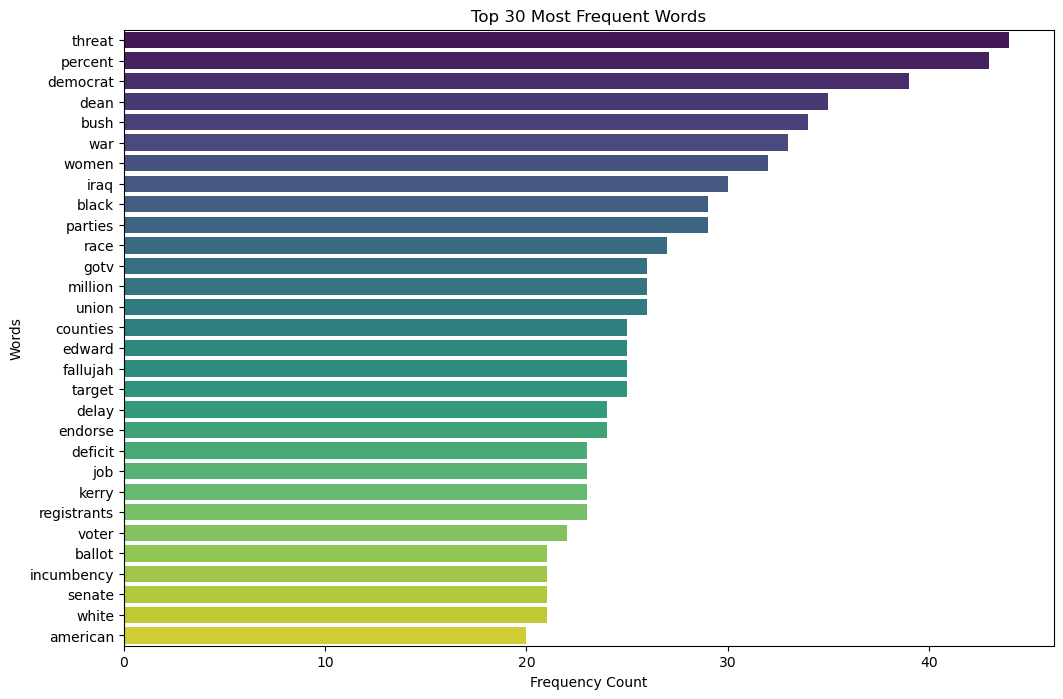

In [51]:
top_words = df.max().nlargest(30)

# Plot the visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.xlabel('Frequency Count')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words')
plt.show()

On the basis of this barplot, it is difficult to determine what is the main topic in the documents and what is special between one group of documents to another,

We do see that the dominant words are: the war in Iraq, Bush, democrat, women and the most prominent word - threat.

## Division into clusters according to the K-MEANS method and according to the DBSCAN method
_____________

#### For each algorithm an optimal value is considered, it is found which cluster has the maximum number of samples and which has the minimum number. And I will create a CSV file containing the data belonging to each cluster separately and examine the results.

## K-MEANS

This function takes a DataFrame (df) and the number of clusters you want (n_clusters). It performs the KMeans algorithm and returns the DataFrame with an added 'Cluster' column indicating the cluster for each record, as well as the inertia value of the KMeans algorithm (a measure of cluster quality, so you can evaluate which number of clusters provides the lowest inertia value).

In [52]:
# Dividing the data into clusters according to the algorithm
def perform_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df)
    return df.copy(), kmeans.inertia_

# Evaluation of the quality of the distribution for 2, 4, 6, 8 clusters
cluster_counts = [2, 4, 6, 8]
sse_values = []

#### To determine the optimal number of clusters, we will assess cluster quality by calculating both the Silhouette Index and SSE (Sum of Squared Errors) 
#### Metrics Overview:
1. **SSE (Sum of Squared Errors):**
   - Measures squared distances between data points and their cluster centroids.
   - It provides insights into how tightly grouped the data points are within their respective clusters; lower SSE implies denser clusters.

2. **Silhouette Score:**
   - Evaluates cluster separation quality.
   - Ranges from -1 to 1; higher values indicate better-defined clusters.
   - Scores near +1 show strong separation, 0 indicates boundary proximity, and negatives suggest potential misclassifications.

3. **Elbow Scaled Inertia:**
   - Helps identify optimal clusters by analyzing scaled inertia reduction rates.
   - An "elbow" in the inertia graph indicates potential optimal cluster count.
   - Balances model complexity and clustering effectiveness visually.

Inertia is the sum of squared distances of all points relative to their cluster centroids. 

Clusters: 2, SSE: 817799.8968688044, Silhouette Score: 0.25231004882556324
Clusters: 4, SSE: 765583.4291995232, Silhouette Score: 0.21161748268224742
Clusters: 6, SSE: 751965.8666169838, Silhouette Score: 0.1950117740443433
Clusters: 8, SSE: 729061.8162494708, Silhouette Score: 0.18235301530666687


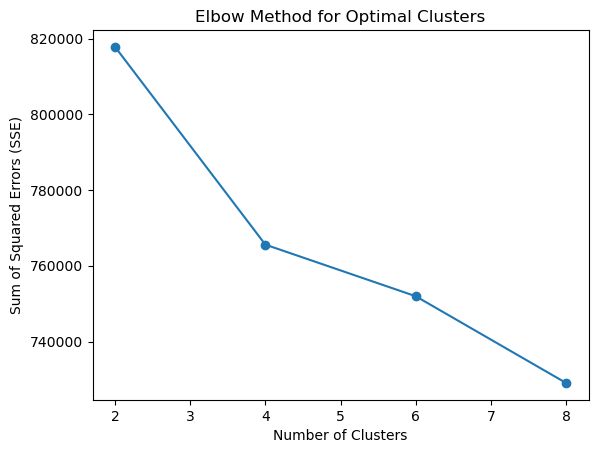

In [53]:
for n_clusters in cluster_counts:
    clustered_df, sse = perform_clustering(n_clusters)
    silhouette_avg = silhouette_score(df, clustered_df['Cluster'])
    sse_values.append(sse)
    print(f"Clusters: {n_clusters}, SSE: {sse}, Silhouette Score: {silhouette_avg}")
    df.drop("Cluster", axis=1)
    clustered_df.drop("Cluster", axis=1)

plt.plot(cluster_counts, sse_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

It can be seen that the lowest SSE is for division into 8, and the highest silhouette is for division into 2, from looking at the SSE and silhouette scores it seems that the optimal division is between 4 and 6.
Based on the graph and the Elbow method, it seems that division into 4 is optimal (Elbow Point) - between 2 and 4 clusters there is a sharp decrease and from 4 clusters to 8 clusters there is a slower decrease, but it is not possible to decide unequivocally, so we will check the  Adjusted Inertia.


#### Adjusted Inertia
is a measure that accounts for cluster separation, helping to distinguish true clusters from closely grouped ones in algorithms like K-means. With Adjusted Inertia, we improve our ability to identify true clusters and distinguish between relevant clusters and those that do not represent separate subgroups, It's used when we need a more meaningful assessment of clustering quality beyond just centroid distances.

Adjusted Inertia for each K and alpha_k:

If alpha is large, I will be more sensitive to the number of clusters I will have.

Best k for alpha_k=0.02: 4
Best k for alpha_k=0.03: 3
Best k for alpha_k=0.04: 2
Best k for alpha_k=0.05: 2


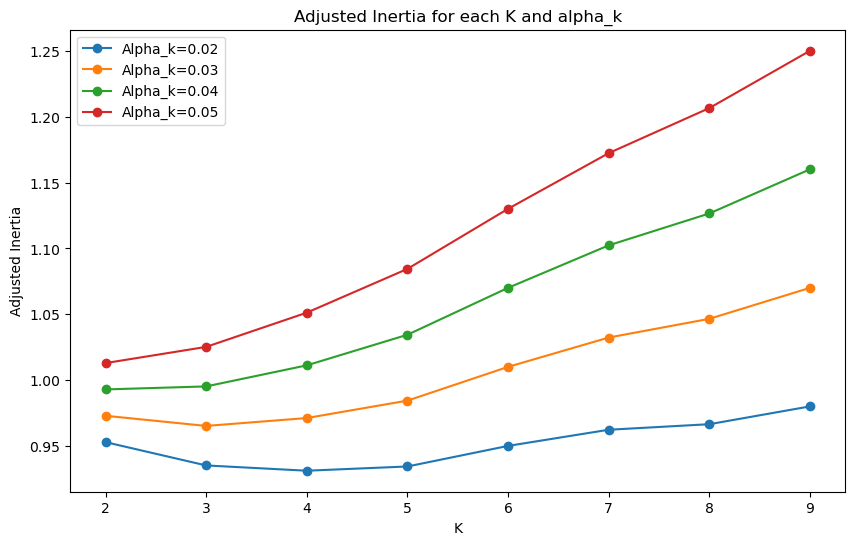

In [54]:
def kMeansRes(scaled_data, k, alpha_k):
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range, alpha_k_values):
    results_list = []
    for alpha_k in alpha_k_values:
        ans = []
        for k in k_range:
            scaled_inertia = kMeansRes(scaled_data, k, alpha_k)
            ans.append((k, scaled_inertia))
        results = pd.DataFrame(ans, columns=['k', f'Alpha_k={alpha_k}']).set_index('k')
        results_list.append(results)

    best_ks = [results.idxmin()[0] for results in results_list]
    return best_ks, results_list

# Parameters
scaled_data = np.asarray(df).astype(float)
k_range = range(2, 10)
alpha_k_values = [0.02, 0.03, 0.04, 0.05]

# Compute adjusted inertia for each alpha_k value
best_ks, results_list = chooseBestKforKMeans(scaled_data, k_range, alpha_k_values)

# Print best k for each alpha_k value
for alpha_k, best_k in zip(alpha_k_values, best_ks):
    print(f"Best k for alpha_k={alpha_k}: {best_k}")

# Plot the results
plt.figure(figsize=(10, 6))
for i, results in enumerate(results_list):
    plt.plot(results, 'o-', label=f"Alpha_k={alpha_k_values[i]}")
plt.title('Adjusted Inertia for each K and alpha_k')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2, 10, 1))
plt.legend()
plt.show()



We can see that when K=4 - this is the minimum point among options 2, 4, 6 or 8

We will continue to check the silhouette

#### How look the silhouette score for each cluster

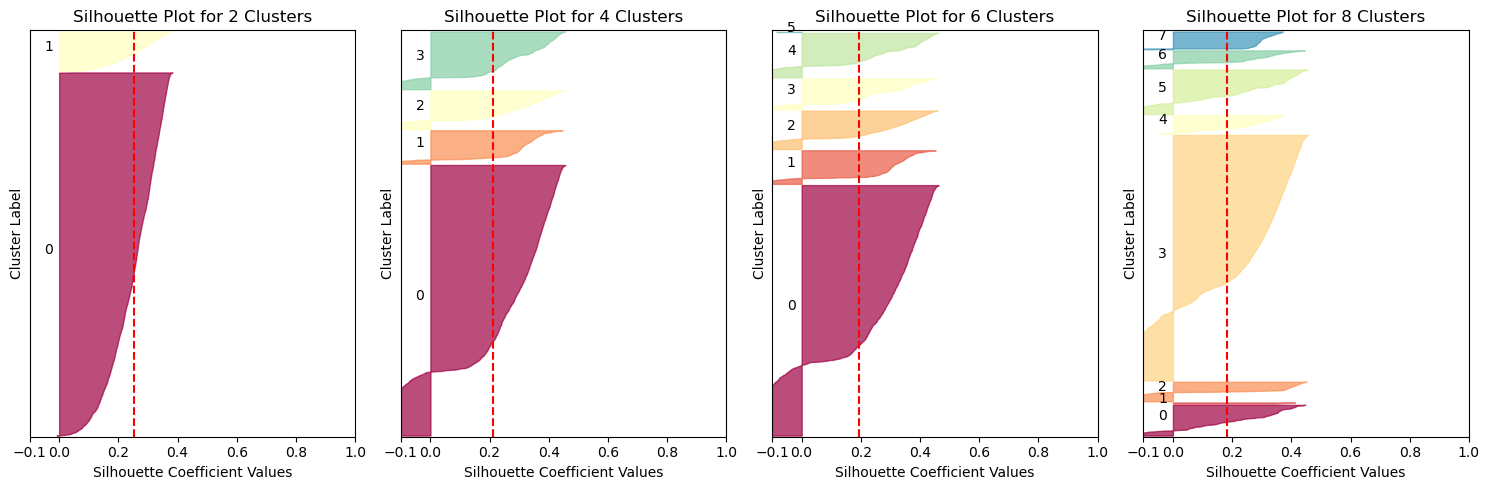

In [58]:
# Initialize a list to store silhouette scores for each number of clusters
silhouette_scores = []

# Create subplots in a single row
fig, axs = plt.subplots(1, len(cluster_counts), figsize=(15, 5))

# Loop through different numbers of clusters
for idx, n_clusters in enumerate(cluster_counts):
    # Perform clustering and get cluster labels
    clustered_df, _ = perform_clustering(n_clusters)
    cluster_labels = clustered_df['Cluster']
    
    # Calculate silhouette score for each sample
    silhouette_vals = silhouette_samples(df, cluster_labels)
    
    # Sort silhouette values for plotting
    silhouette_vals.sort()
    
    # Calculate average silhouette score for this number of clusters
    silhouette_avg = np.mean(silhouette_vals)
    silhouette_scores.append(silhouette_avg)
    
    # Add silhouette plot with grid to the corresponding subplot
    ax = axs[idx]
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # Draw vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear y-axis ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()


The broader the color, the larger the cluster size it represents, indicating a bigger group. Silhouette scores less than 0 indicate overlap with another cluster. When a silhouette plot crosses the red dashed line, it indicates the extent of separation from other clusters.

**Also according to the silhouette we can say that 4 clusters will be ideal.**

In [10]:
n_clusters = 4
clustered_df, sse = perform_clustering(n_clusters)
clustered_df.to_csv('clustered_df_K-MEANS.csv', index=False)

#### The cluster that has the maximum number of samples and the cluster that has the minimum number


In [11]:
max_cluster = clustered_df['Cluster'].value_counts().idxmax()
min_cluster = clustered_df['Cluster'].value_counts().idxmin()
max_count = clustered_df['Cluster'].value_counts().max()
min_count = clustered_df['Cluster'].value_counts().min()
print(f"Cluster with max examples: {max_cluster} ,Count: {max_count}")
print(f"Cluster with min examples: {min_cluster} ,Count: {min_count}")

Cluster with max examples: 2 ,Count: 2188
Cluster with min examples: 0 ,Count: 304


### Create an Excel file for each individual cluster that contains the data belonging to it

In [12]:
# Create CSV files for each cluster
for cluster in range(n_clusters):
    cluster_data = clustered_df[clustered_df['Cluster'] == cluster]
    cluster_data.drop(columns='Cluster', inplace=True)
    cluster_data.to_csv(f'cluster_{cluster}.csv', index=False)
    print("Cluster",cluster,"data exported to cluster_",cluster,".csv")

Cluster 0 data exported to cluster_ 0 .csv
Cluster 1 data exported to cluster_ 1 .csv
Cluster 2 data exported to cluster_ 2 .csv
Cluster 3 data exported to cluster_ 3 .csv


Cluster data - cluster_0:


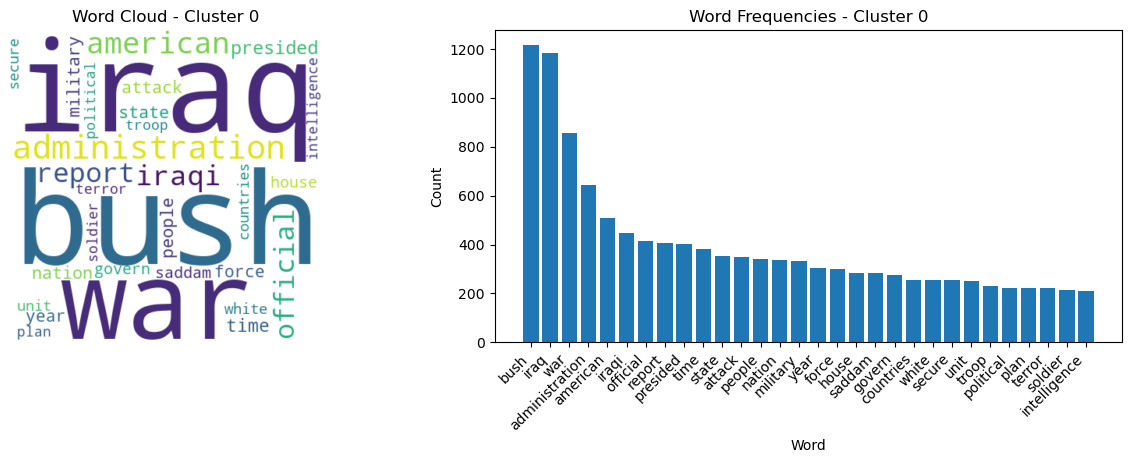

Cluster data - cluster_1:


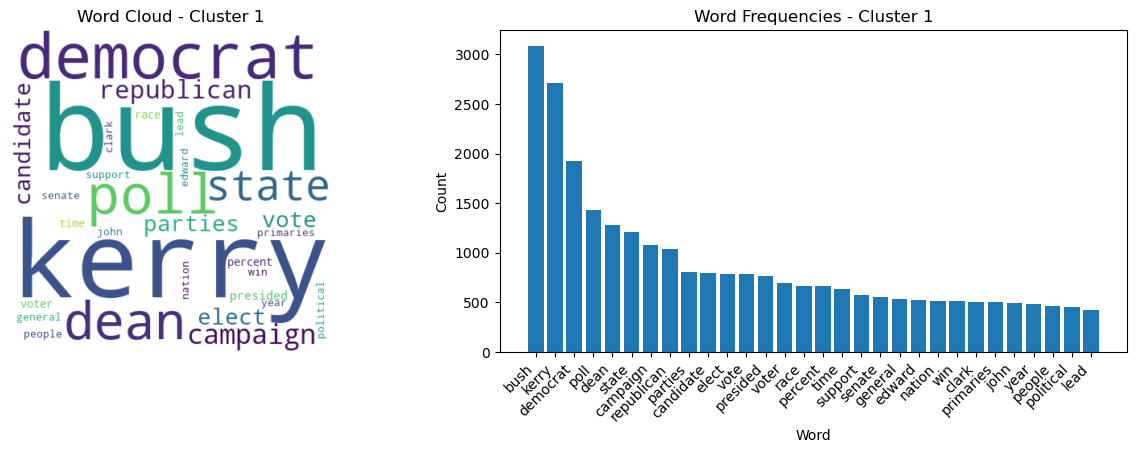

Cluster data - cluster_2:


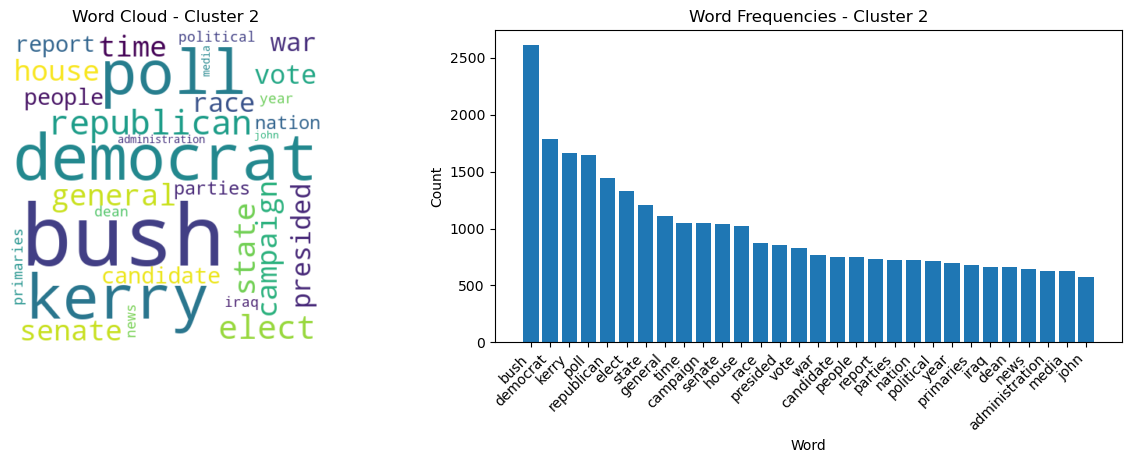

Cluster data - cluster_3:


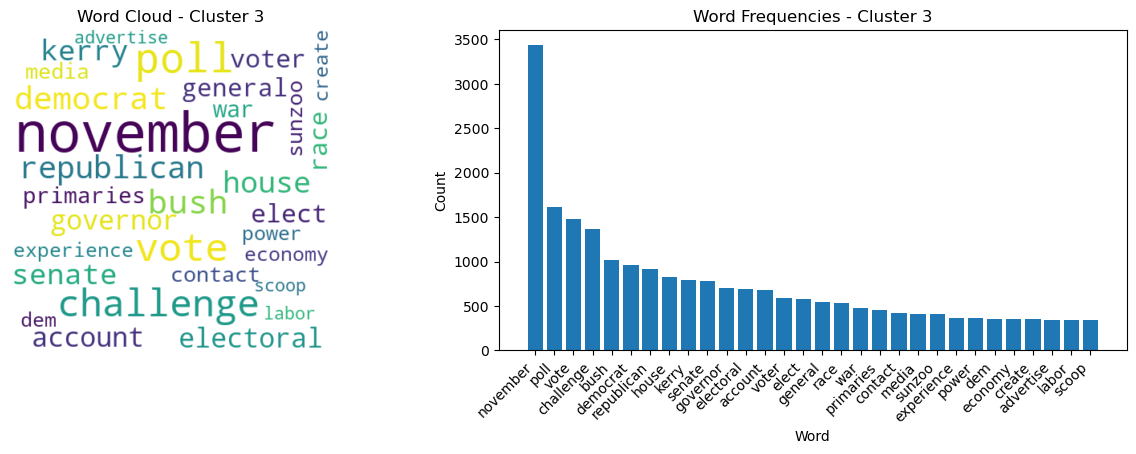

In [13]:
# Set the number of plots per row
plots_per_row = 2

for cluster in range(n_clusters):
    print(f"Cluster data - cluster_{cluster}:")
    cluster_data = pd.read_csv(f'cluster_{cluster}.csv')
    
    # Calculate word counts
    word_counts = cluster_data.sum(axis=0).sort_values(ascending=False)
    word_counts = pd.DataFrame(word_counts)
    word_counts = word_counts.reset_index()
    word_counts = word_counts.rename(columns={'index': 'Word', 0: 'Count'})
    word_counts_30 = word_counts.head(30)
    
    # Generate word cloud
    word_cloud_dict = dict(zip(word_counts_30['Word'], word_counts_30['Count']))
    wordcloud = WordCloud(width=400, height=400, background_color='white')
    wordcloud.generate_from_frequencies(word_cloud_dict)
    
    # Plot word cloud
    plt.figure(figsize=(13, 8))  # Larger figure size for both plots
    plt.subplot(2, plots_per_row, 1)  # Set subplot for word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Cluster {cluster}')
    
    # Generate bar chart for word frequencies
    plt.subplot(2, plots_per_row, 2)  # Set subplot for word frequencies
    plt.bar(word_counts_30['Word'], word_counts_30['Count'])
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title(f'Word Frequencies - Cluster {cluster}')
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(f'wordcloud_and_freq_cluster_{cluster}.png')
    plt.show()


## You can see how the frequency of the words in each cluster gives a fairly clear tone to the subject in question in the documents. Each cluster dealt with a slightly different topic during the 2004 US presidential elections.

**In cluster 0,** the central words are "Bush," "Iraq," and "war." These documents delve into the invasion and attack by the U.S. in Iraq during Bush's presidency. Bush saw Iraq as a threat due to its alleged weapons development, leading to Congress approving military action, starting the Iraq War in 2003.

**In cluster 1,** these documents deal with pre-election polls leading up to the US presidential election. Key figures include George W. Bush, the Republican incumbent seeking re-election, John Kerry as the Democratic candidate, and Howard Dean, a prominent Democratic contender during the primaries.

**In cluster 2** deals with the political competition between the two largest parties in the United States, the Democrats and the Republicans. Specifically, it focuses on the rivalry between George W. Bush, representing the Republican Party, and John Kerry, representing the Democratic Party. This cluster examines the likely contrasting policies, campaign strategies, and public perceptions that define the broader partisan dynamics in American politics.

**In cluster 3** the emphasis is on the timing of the elections, with a specific emphasis on the month of November when the elections are held. The word "November" stands out significantly, followed by the words: "survey", "vote" and "challenge". This cluster will likely delve into discussions about election processes, voter turnout, survey data, and the challenges and overall electoral dynamics that emerge during this critical period in November.

### For the K-mens algorithm we will perform a PCA algorithm on the data and repeat the steps again to understand if the above step helped to achieve better clustering

In [14]:
#StandardScaler:
features = df.columns
x = df.loc[:,features].values
X = StandardScaler().fit_transform(x)

In [15]:
# pca - variance_explained :
pca = PCA(n_components=None)
pca.fit(X)

# Calculate the variance explained
variance_explained = np.cumsum(pca.explained_variance_ratio_)

# Finding the number of components corresponding to the explained variance of 0.80
n_components_for_variance = np.argmax(variance_explained >= 0.80) + 1

print(f'Number of features before changing: {len(features)}')
print(f'Number of components required to achieve variance explained of 0.80 - after changing: {n_components_for_variance}')


Number of features before changing: 1546
Number of components required to achieve variance explained of 0.80 - after changing: 579


In [16]:
# pca:

n_components = n_components_for_variance
pca = PCA(n_components)
PrincipalComponents = pca.fit_transform(X)

PrincipalDF = pd.DataFrame(data=PrincipalComponents, columns=[f'Principal Component {i}' for i in range (n_components)])

PrincipalDF

,Principal Component 0,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,...,Principal Component 569,Principal Component 570,Principal Component 571,Principal Component 572,Principal Component 573,Principal Component 574,Principal Component 575,Principal Component 576,Principal Component 577,Principal Component 578
0,-2.952117,0.533620,-0.080091,0.123273,-1.450242,0.888589,-3.749650,-1.206127,2.601633,-0.373846,...,0.135540,0.334013,0.255473,-0.669002,1.223161,0.553285,0.594711,0.932290,0.184646,-0.684975
1,-3.392105,-2.831885,-0.236883,-0.293806,-2.257524,-0.992251,-1.007744,0.323338,-1.540891,-1.506924,...,-0.037681,1.254067,-0.315949,-0.979213,-0.282212,0.833564,-0.072200,-0.798461,0.539962,-0.062407
2,23.519528,-4.994131,-17.507357,-11.191110,0.214823,-12.132932,-1.644152,-0.537791,-0.024939,1.174827,...,0.041149,-0.808335,-0.028192,-0.389510,-0.319622,-0.042713,0.777041,0.574115,0.411633,-0.448670
3,-2.011269,1.448427,-0.807848,-0.064569,0.118439,0.541330,-0.786769,-1.528725,-1.883282,-2.052580,...,-0.376367,-0.186064,-0.553057,-0.709955,-0.487509,0.320772,0.661246,0.646500,0.918187,0.937887
4,-2.616584,2.422425,-1.164630,-1.287248,2.141052,0.318815,1.537912,1.228598,3.334900,-0.540625,...,-0.168982,-0.028933,-0.198154,-1.246479,-1.011206,0.664059,-0.039968,1.318506,-1.898483,0.159420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,-2.782257,-3.905839,-0.520214,0.225470,0.211909,-0.373975,0.455298,0.462642,1.319445,-0.887737,...,-0.720937,0.389963,-0.662237,-0.722861,0.495265,0.031689,0.231023,0.373920,0.232719,-0.314635
3426,-3.284308,-5.505195,-0.241980,-0.041105,-0.772550,-0.290369,0.333589,-0.282766,0.541593,0.185417,...,-0.325029,-0.558865,-0.271902,-0.321520,0.176091,0.261241,0.281368,0.434847,-0.513041,0.081974
3427,-3.065183,-1.938143,0.014906,0.024544,-0.891824,-0.178110,1.245538,-1.270409,-2.247356,-0.317249,...,-0.239936,-1.094296,-1.179285,0.321445,1.031225,0.699985,0.468301,-0.842234,0.405082,1.621002
3428,-3.435958,-3.577170,-0.132683,-0.345534,0.695065,0.500796,-0.443959,-1.150099,-1.245223,2.379888,...,0.410221,-0.651585,-0.290707,-1.049570,-0.233880,2.089747,0.014653,-0.584531,0.573442,0.676780


##### k-means & pca:

In [17]:
# Dividing the data into clusters according to the algorithm
def perform_clustering_PCA(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    PrincipalDF['Cluster'] = kmeans.fit_predict(PrincipalDF)
    return PrincipalDF.copy(), kmeans.inertia_

# Evaluation of the quality of the distribution for 2, 4, 6, 8 clusters
cluster_counts = [2, 4, 6, 8]
sse_values = []

Clusters: 2, SSE: 3957345.3106166106, Silhouette Score: 0.2365940966156151
Clusters: 4, SSE: 3816539.94781942, Silhouette Score: 0.24338896214469263
Clusters: 6, SSE: 3789924.7389656184, Silhouette Score: 0.2017796916906539
Clusters: 8, SSE: 3812113.469780933, Silhouette Score: 0.23811663037439393


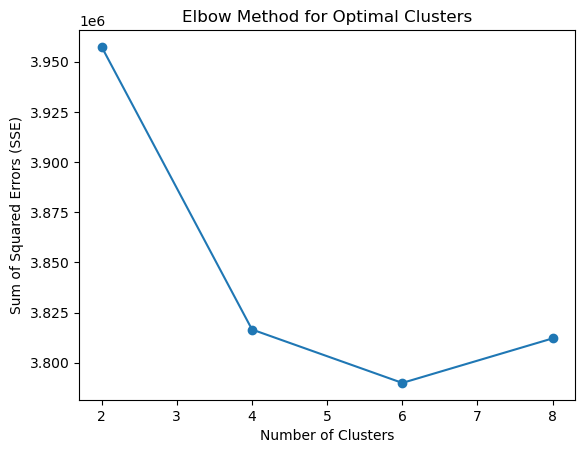

In [18]:
for n_clusters in cluster_counts:
    clustered_df, sse = perform_clustering_PCA(n_clusters)
    silhouette_avg = silhouette_score(PrincipalDF, clustered_df['Cluster'])
    sse_values.append(sse)
    print(f"Clusters: {n_clusters}, SSE: {sse}, Silhouette Score: {silhouette_avg}")
    PrincipalDF.drop("Cluster", axis=1)
    clustered_df.drop("Cluster", axis=1)

plt.plot(cluster_counts, sse_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

#### How look the silhouette score for each cluster

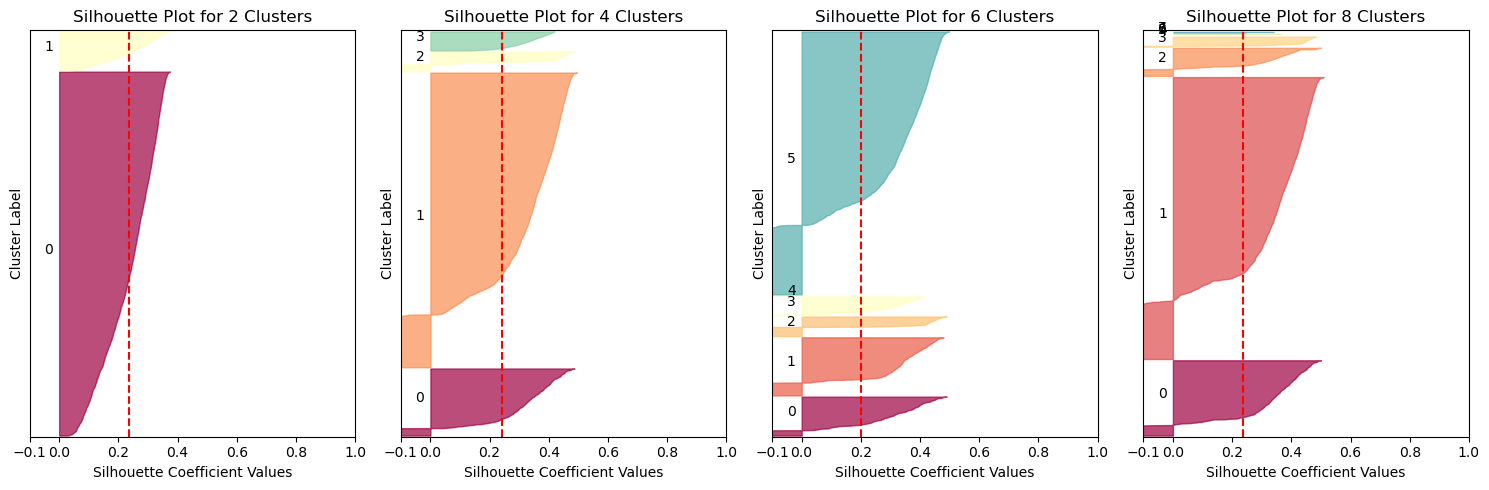

In [19]:

# Initialize a list to store silhouette scores for each number of clusters
silhouette_scores = []

# Create subplots in a single row
fig, axs = plt.subplots(1, len(cluster_counts), figsize=(15, 5))

# Loop through different numbers of clusters
for idx, n_clusters in enumerate(cluster_counts):
    # Perform clustering and get cluster labels
    clustered_df, _ = perform_clustering_PCA(n_clusters)
    cluster_labels = clustered_df['Cluster']
    
    # Calculate silhouette score for each sample
    silhouette_vals = silhouette_samples(PrincipalDF, cluster_labels)
    
    # Sort silhouette values for plotting
    silhouette_vals.sort()
    
    # Calculate average silhouette score for this number of clusters
    silhouette_avg = np.mean(silhouette_vals)
    silhouette_scores.append(silhouette_avg)
    
    # Add silhouette plot with grid to the corresponding subplot
    ax = axs[idx]
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(PrincipalDF) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # Draw vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear y-axis ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()


Out of the following options 2, 4, 6, 8 is the most suitable based on SEE and this silhouette is divided into 6 clusters

**According to the silhouette and SEE we can say that 6 clasters will be ideal.**

In [40]:
n_clusters = 6
clustered_df, sse = perform_clustering_PCA(n_clusters)
clustered_df.to_csv('clustered_PrincipalDF_K-MEANS.csv', index=False)

#### The cluster that has the maximum number of samples and the cluster that has the minimum number


In [41]:
df_pca = data.drop("Document", axis=1)
df_pca["Cluster"] = clustered_df["Cluster"]


In [42]:
df_pca['Cluster'].value_counts()


1    2429
0     341
4     329
2     169
3      83
5      79
Name: Cluster, dtype: int64

In [43]:
max_cluster = df_pca['Cluster'].value_counts().idxmax()
min_cluster = df_pca['Cluster'].value_counts().idxmin()
max_count = df_pca['Cluster'].value_counts().max()
min_count = df_pca['Cluster'].value_counts().min()
print(f"Cluster with max examples: {max_cluster} ,Count: {max_count}")
print(f"Cluster with min examples: {min_cluster} ,Count: {min_count}")

Cluster with max examples: 1 ,Count: 2429
Cluster with min examples: 5 ,Count: 79


#### Create an Excel file for each individual cluster that contains the data belonging to it

In [44]:
# Create CSV files for each cluster
for cluster in range(n_clusters):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    cluster_data.drop(columns='Cluster', inplace=True)
    cluster_data.to_csv(f'cluster_{cluster}.csv', index=False)
    print("Cluster",cluster,"data exported to cluster_",cluster,".csv")

Cluster 0 data exported to cluster_ 0 .csv
Cluster 1 data exported to cluster_ 1 .csv
Cluster 2 data exported to cluster_ 2 .csv
Cluster 3 data exported to cluster_ 3 .csv
Cluster 4 data exported to cluster_ 4 .csv
Cluster 5 data exported to cluster_ 5 .csv


Cluster data - cluster_0:


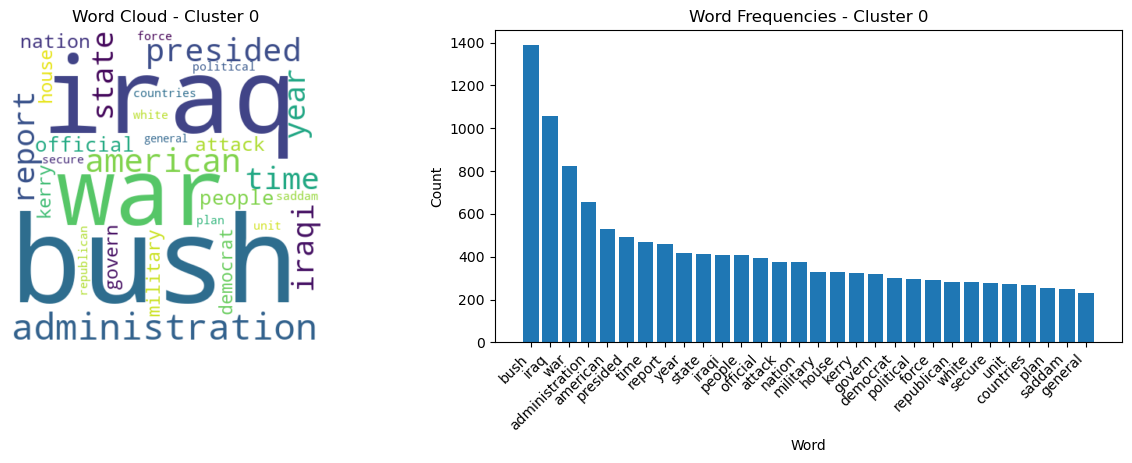

Cluster data - cluster_1:


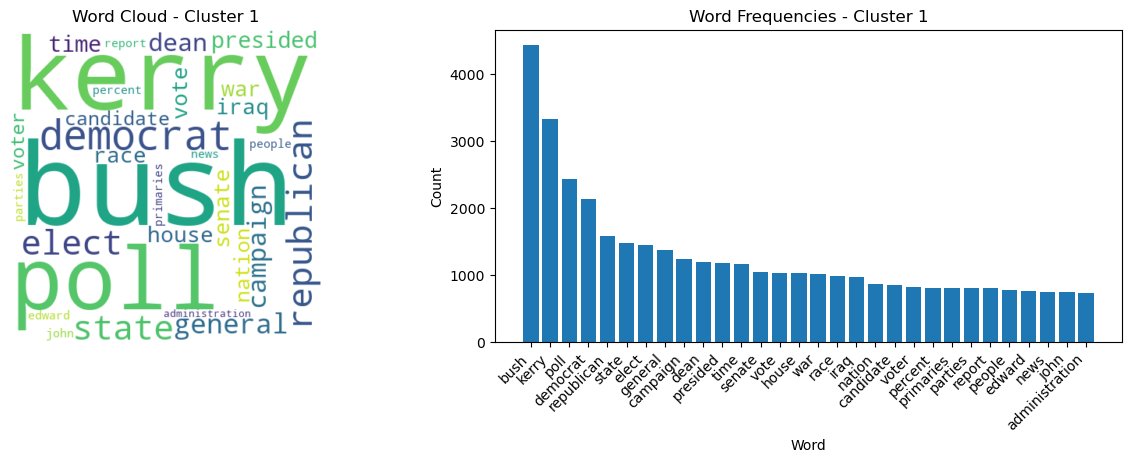

Cluster data - cluster_2:


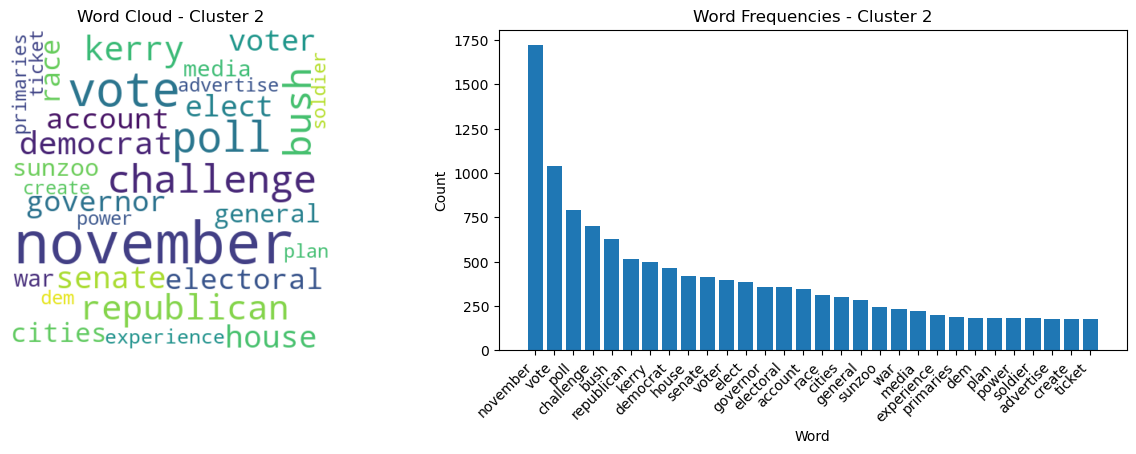

Cluster data - cluster_3:


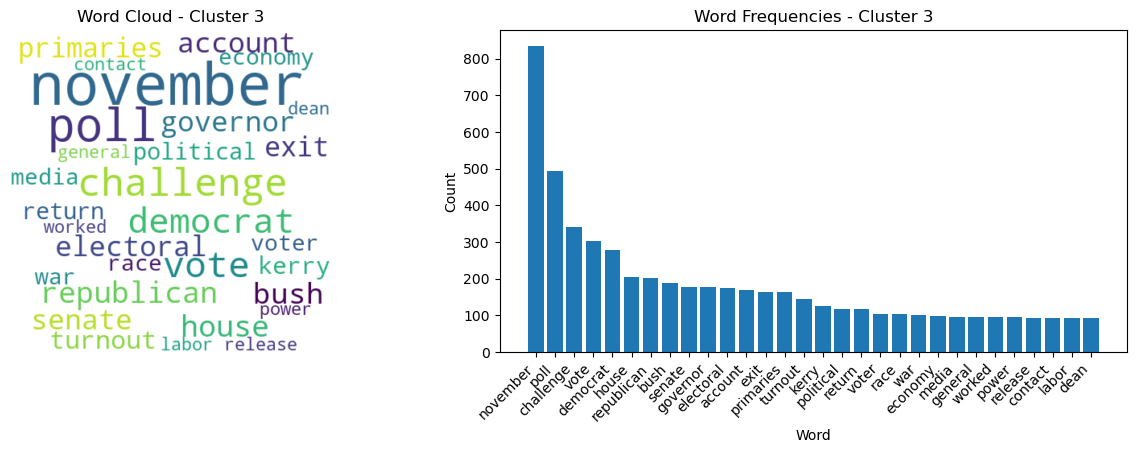

Cluster data - cluster_4:


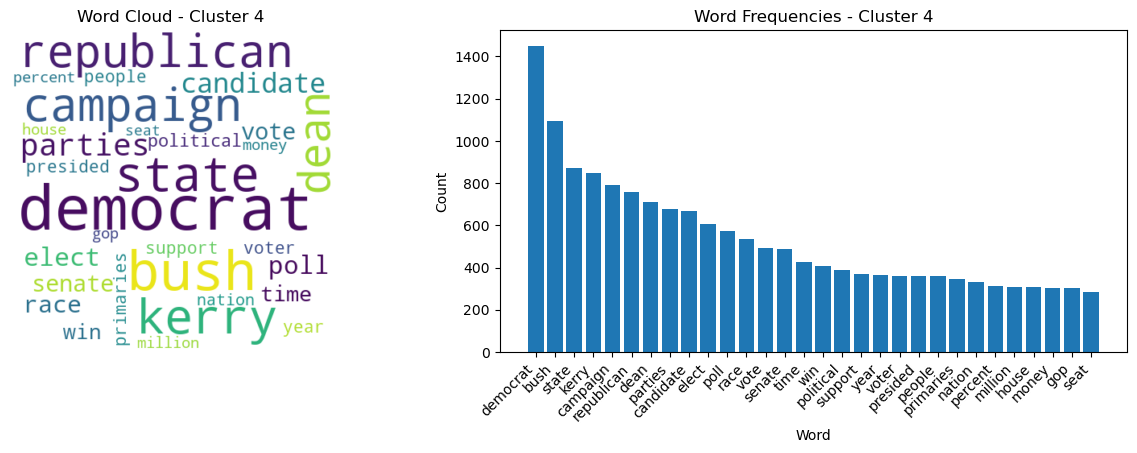

Cluster data - cluster_5:


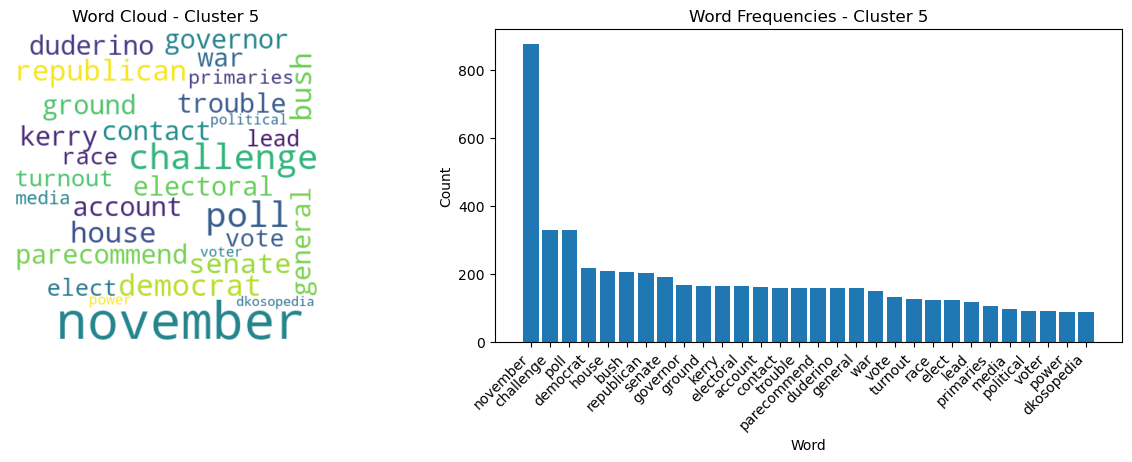

In [45]:
# Set the number of plots per row
plots_per_row = 2

for cluster in range(n_clusters):
    print(f"Cluster data - cluster_{cluster}:")
    cluster_data = pd.read_csv(f'cluster_{cluster}.csv')
    
    # Calculate word counts
    word_counts = cluster_data.sum(axis=0).sort_values(ascending=False)
    word_counts = pd.DataFrame(word_counts)
    word_counts = word_counts.reset_index()
    word_counts = word_counts.rename(columns={'index': 'Word', 0: 'Count'})
    word_counts_30 = word_counts.head(30)
    
    # Generate word cloud
    word_cloud_dict = dict(zip(word_counts_30['Word'], word_counts_30['Count']))
    wordcloud = WordCloud(width=400, height=400, background_color='white')
    wordcloud.generate_from_frequencies(word_cloud_dict)
    
    # Plot word cloud
    plt.figure(figsize=(13, 8))  # Larger figure size for both plots
    plt.subplot(2, plots_per_row, 1)  # Set subplot for word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Cluster {cluster}')
    
    # Generate bar chart for word frequencies
    plt.subplot(2, plots_per_row, 2)  # Set subplot for word frequencies
    plt.bar(word_counts_30['Word'], word_counts_30['Count'])
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title(f'Word Frequencies - Cluster {cluster}')
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(f'wordcloud_and_freq_cluster_{cluster}.png')
    plt.show()


## The conclusions of the division into clusters after PCA

### First of all we see that here the division is into 6 clusters (before PCA there were 4 clusters)

Here too **cluster 0,** deals with the invasion of the USA and the attack on Iraq during Bush's presidency, the key words are "Bush", "Iraq" and "war".

**Cluster 1,** deals with the results of the polls between Bush and Kerry.

**Cluster 4,** deals with the comparison and competition between the Democratic Party and the Republican Party.

Clusters 2,3,5 are quite similar:

**Cluster 2,** deals with polls and elections in preparation for election day in November, in the contest between Bush and Kerry.

**Cluster 3,** deals with polls and elections in preparation for election day in November. Emphasizes how the electoral system works and deals less with the competitors. Gives more emphasis on the Republican side.

**Cluster 5,** in terms of words, is the same as cluster 3, but gives more emphasis on the Republican side.



#### From looking at the SSE and silhouette results with and without PCA, it seems that after PCA the values are better for each type of partition.

________
## DBSCAN

#### Displaying the data by distance between documents before dividing into clusters

In [26]:
df_DB = data.drop("Document", axis=1)
df_DB.index = range(1, len(df) + 1)

In [27]:
df_DB

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Similarity between documents according to cosine similarity

In [28]:
cosine_matrix = cosine_similarity(df_DB.values)

# Euclidean distance calculation
# Convert similarity to distances
distance = 1 - cosine_matrix

### Displaying the data according to the T-SNE algorithm:

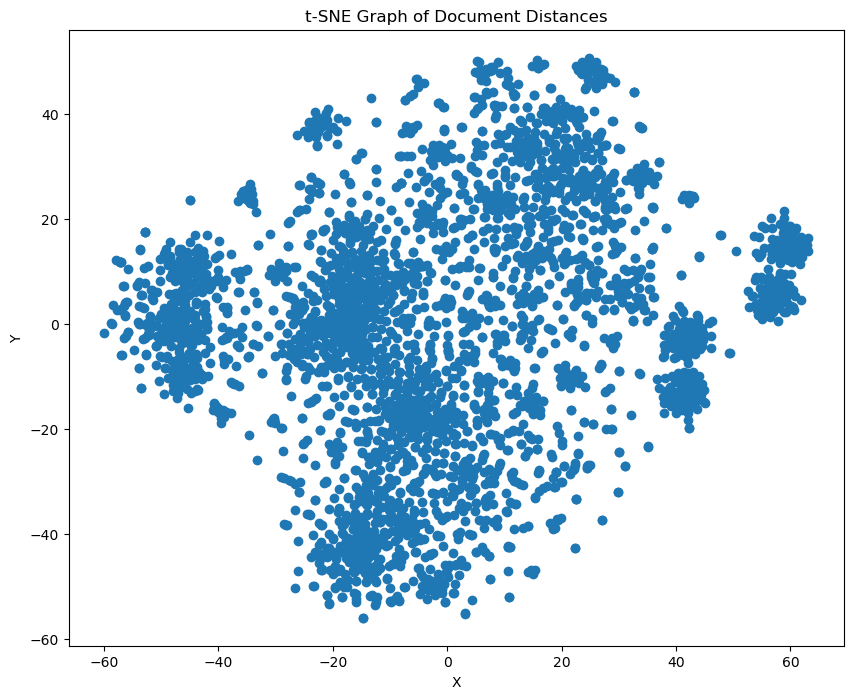

In [29]:
distance[distance < 0] = 0  # Set negative values to 0

# Converting the distance to two dimensions using t-SNE
tsne = TSNE(n_components=2, metric='precomputed', init='random')
tsne_transformed = tsne.fit_transform(distance)

# Scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("t-SNE Graph of Document Distances")
plt.show()

#### From looking at the graph, it can be seen that there are certain clear groups that apparently deal with the same topics (more on the edges), and there is the center of the graph, an area that is difficult to identify what its clear shape is. Perhaps these documents in this area will deal with relatively identical topics, but each document is from a slightly different point of view

#### Performing the DBSCAN algorithm on a t-sne graph

min_samples=70: Silhouette Score = 0.1730651502806131, SSE = 61733.14812646086
min_samples=75: Silhouette Score = 0.17539961168437895, SSE = 61220.23888676067
min_samples=80: Silhouette Score = 0.16678870450459174, SSE = 61846.69249425139


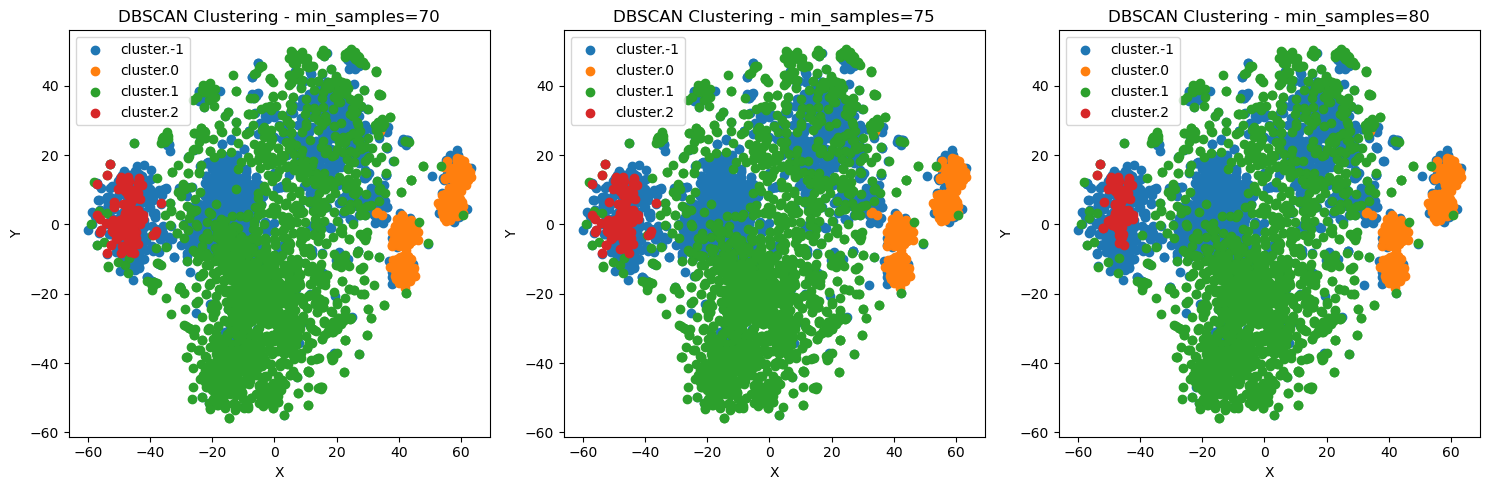

In [30]:
# Determination of parameters
epsilon = 3.4 
min_samples = [70, 75, 80]

# Initialize lists to store silhouette scores and SSE values
silhouette_scores = []
sse_values = []

fig, axes = plt.subplots(1, len(min_samples), figsize=(15, 5))

for i, min_samples_val in enumerate(min_samples):
    # Initialize DBSCAN
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples_val)
    
    # Fit the model and predict clusters
    clusters = dbscan.fit_predict(cosine_matrix)
    
    # Calculation of the silhouette score
    silhouette_avg = silhouette_score(cosine_matrix, clusters)
    silhouette_scores.append(silhouette_avg)
    
    # Calculation of SSE
    sse = 0
    for cluster_label in np.unique(clusters):
        cluster_points = cosine_matrix[clusters == cluster_label]
        cluster_center = np.mean(cluster_points, axis=0)
        dist_to_center = np.linalg.norm(cluster_points - cluster_center, axis=1)
        sse += np.sum(dist_to_center ** 2)
    sse_values.append(sse)
    
    # Print silhouette score and SSE
    print(f"min_samples={min_samples_val}: Silhouette Score = {silhouette_avg}, SSE = {sse}")

    # Plotting the clusters
    ax = axes[i] if len(min_samples) > 1 else axes
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"DBSCAN Clustering - min_samples={min_samples_val}")

    for cluster in np.unique(clusters):
        indices = np.where(clusters == cluster)
        ax.scatter(tsne_transformed[indices, 0], tsne_transformed[indices, 1], label=f'cluster.{cluster}')
    ax.legend()

plt.tight_layout()
plt.show()

You can see from the graphs and the silhouette value that min_samples=75 returns the highest silhouette value and the smallest SSE and divides the data into 3 clusters, but there are many outliers

##### Therefore we chose: min_samples=75 (3 clusters)

### Displaying the data according to the MDS algorithm:

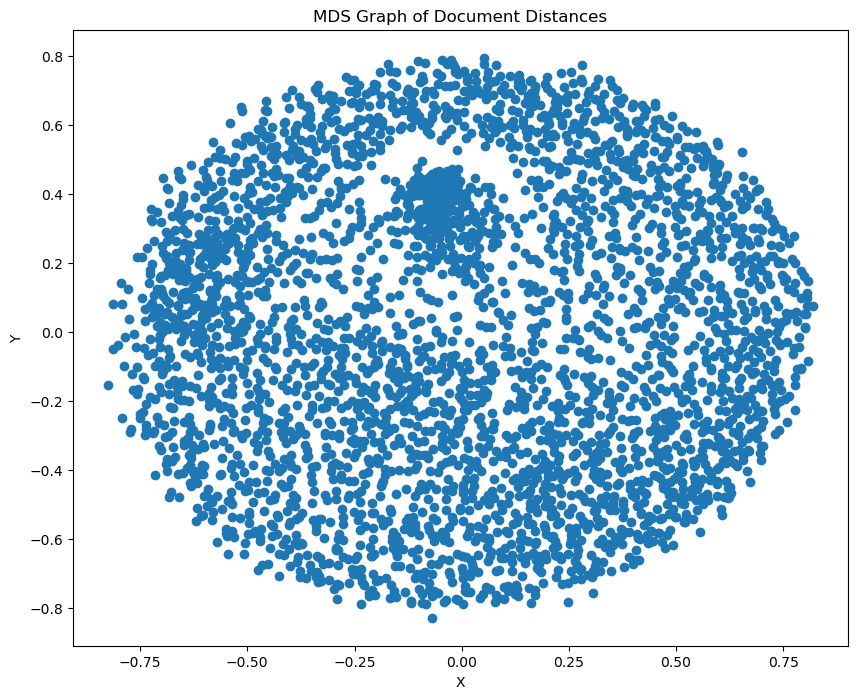

In [31]:
# Converting the distance to two dimensions
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_transformed = mds.fit_transform(distance)

# Scatterplot
plt.figure(figsize=(10,8))
plt.scatter(mds_transformed[:,0],mds_transformed[:,1])
    
plt.xlabel("X")
plt.ylabel("Y")
plt.title("MDS Graph of Document Distances")
plt.show()

#### Performing the DBSCAN algorithm on a mds graph

An initial test for several parameter options, to see which parameter allows as few exceptions as possible (cluster = -1), divides between 3 and 6 clusters and its silhouette value is positive

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

eps_values = [0.01, 0.02, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1, 2, 3]
min_samples_values = [5, 7, 8, 9, 11, 12, 13, 14, 15, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 200]

best_silhouette_score = -1  # Initialize with a lower value
best_eps = None
best_min_samples = None
best_outlier_percentage = float('inf')
best_num_clusters = 0

for eps in eps_values:
    for min_samples_val in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples_val)
        clusters = dbscan.fit_predict(cosine_matrix)
        
        # Exclude outliers from clustering
        unique_clusters, counts = np.unique(clusters, return_counts=True)
        counts_dict = dict(zip(unique_clusters, counts))
        if -1 in counts_dict:  # Check if outliers are present
            outlier_percentage = counts_dict[-1] / len(clusters)
            num_clusters = len(unique_clusters) - 1  # Exclude outliers from counting clusters
            
            if 3 <= num_clusters <= 6 and outlier_percentage < best_outlier_percentage:
                silhouette_avg = silhouette_score(cosine_matrix, clusters)
                if silhouette_avg > 0:
                    best_silhouette_score = silhouette_avg
                    best_outlier_percentage = outlier_percentage
                    best_eps = eps
                    best_min_samples = min_samples_val
                    best_num_clusters = num_clusters

print(f"Best parameters - eps: {best_eps}, min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Outlier Percentage: {best_outlier_percentage}")
print(f"Number of Clusters: {best_num_clusters}")


Best parameters - eps: 3, min_samples: 20
Best Silhouette Score: 0.07132845338431514
Outlier Percentage: 0.46530612244897956
Number of Clusters: 4


Examining and determining the distribution according to the visibility of the graph around the recommended parameters

min_samples=30: Silhouette Score = 0.1301675763310476, SSE = 65304.98160641705
min_samples=40: Silhouette Score = 0.08886439247019853, SSE = 63684.8628578615
min_samples=50: Silhouette Score = 0.15218247323377584, SSE = 63553.93879991758


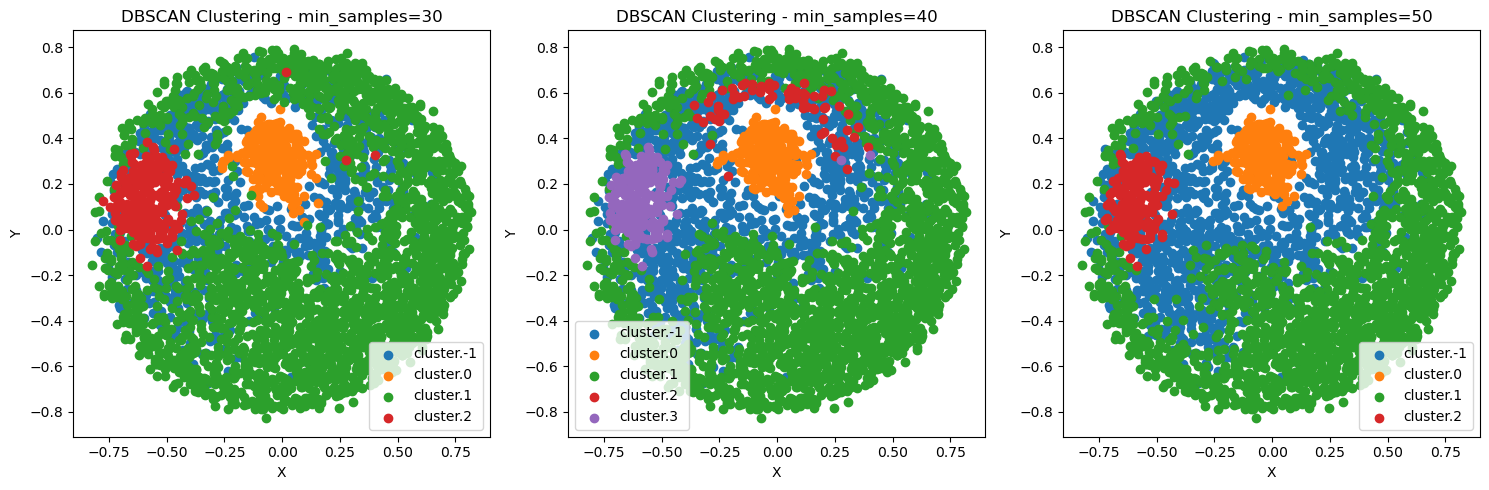

In [33]:
# Determination of parameters
epsilon = 3.3
min_samples = [30, 40, 50]

# Initialize lists to store silhouette scores and SSE values
silhouette_scores = []
sse_values = []

fig, axes = plt.subplots(1, len(min_samples), figsize=(15, 5))

for i, min_samples_val in enumerate(min_samples):
    # Initialize DBSCAN
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples_val)
    
    # Fit the model and predict clusters
    clusters = dbscan.fit_predict(cosine_matrix)
    
    # Calculation of the silhouette score
    silhouette_avg = silhouette_score(cosine_matrix, clusters)
    silhouette_scores.append(silhouette_avg)
    
    # Calculation of SSE
    sse = 0
    for cluster_label in np.unique(clusters):
        cluster_points = cosine_matrix[clusters == cluster_label]
        cluster_center = np.mean(cluster_points, axis=0)
        dist_to_center = np.linalg.norm(cluster_points - cluster_center, axis=1)
        sse += np.sum(dist_to_center ** 2)
    sse_values.append(sse)
    
    # Print silhouette score and SSE
    print(f"min_samples={min_samples_val}: Silhouette Score = {silhouette_avg}, SSE = {sse}")

    # Plotting the clusters
    ax = axes[i] if len(min_samples) > 1 else axes
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"DBSCAN Clustering - min_samples={min_samples_val}")

    for cluster in np.unique(clusters):
        indices = np.where(clusters == cluster)
        ax.scatter(mds_transformed[indices, 0], mds_transformed[indices, 1], label=f'cluster.{cluster}')
    ax.legend()

plt.tight_layout()
plt.show()

You can see from the graphs and the silhouette value that min_samples=40 returns the highest silhouette value and the smallest SSE and divides the data into 4 clusters, but there are many outliers

##### Therefore I chose: min_samples=40 (4 clusters)

## Performing DBSCAN after mds

In [34]:

# Initializing the model and setting the parameters
dbscan = DBSCAN(eps=3.3, min_samples=40)

# Performing the algorithm and calculating the clusters
clusters = dbscan.fit_predict(cosine_matrix)

# Adding the result to the dataframe
df_DB['Cluster'] = clusters

# Finding the number of different clusters created
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Number of clusters: {num_clusters}')


df_DB_filtered = df_DB[df_DB['Cluster'] != -1]

df_DB_filtered.to_csv('clustered_df_DBSCAN.csv', index=False)

# הדפסת התוצאה
df_DB_filtered.head()


Number of clusters: 4


,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,year,yesterday,york,youll,young,youre,youve,zogby,zone,Cluster
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### The cluster that has the maximum number of samples and the cluster that has the minimum number

In [35]:
max_cluster = df_DB_filtered['Cluster'].value_counts().idxmax()
min_cluster = df_DB_filtered['Cluster'].value_counts().idxmin()
max_count = df_DB_filtered['Cluster'].value_counts().max()
min_count = df_DB_filtered['Cluster'].value_counts().min()
print(f"Cluster with max examples: {max_cluster} ,Count: {max_count}")
print(f"Cluster with min examples: {min_cluster} ,Count: {min_count}")

Cluster with max examples: 1 ,Count: 1933
Cluster with min examples: 2 ,Count: 68


### Create an Excel file for each individual cluster that contains the data belonging to it

In [38]:
# Create CSV files for each cluster
for cluster in range(num_clusters):
    cluster_data = df_DB_filtered[df_DB_filtered['Cluster'] == cluster]
    cluster_data.drop(columns='Cluster', inplace=True)
    cluster_data.to_csv(f'cluster_DBSCAN_{cluster}.csv', index=False)
    print("Cluster",cluster,"data exported to cluster_DBSCAN_",cluster,".csv")

Cluster 0 data exported to cluster_DBSCAN_ 0 .csv
Cluster 1 data exported to cluster_DBSCAN_ 1 .csv
Cluster 2 data exported to cluster_DBSCAN_ 2 .csv
Cluster 3 data exported to cluster_DBSCAN_ 3 .csv


Cluster data - cluster_0:


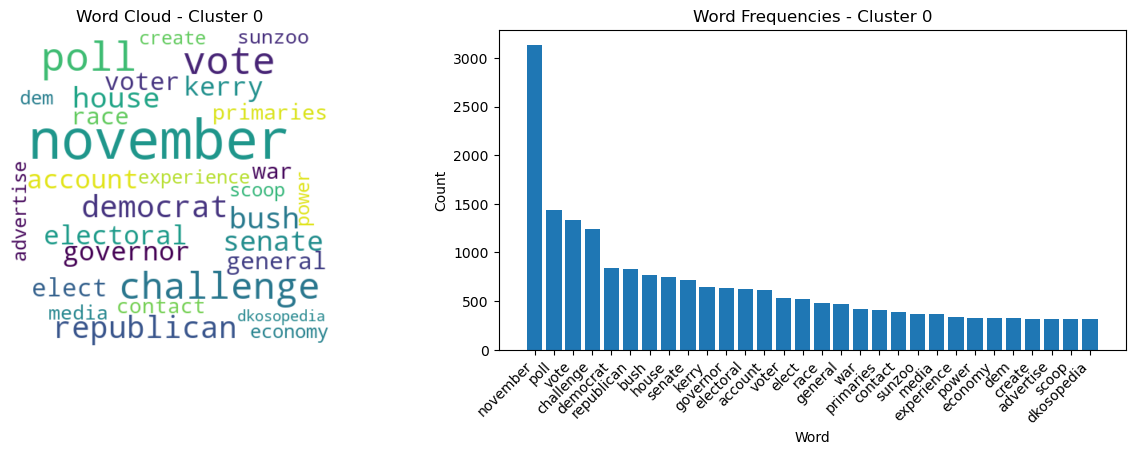

Cluster data - cluster_1:


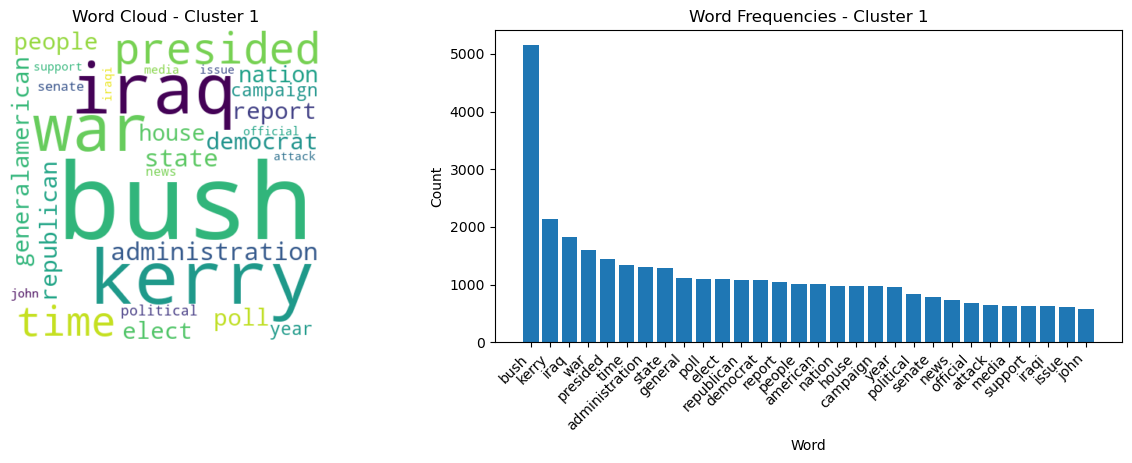

Cluster data - cluster_2:


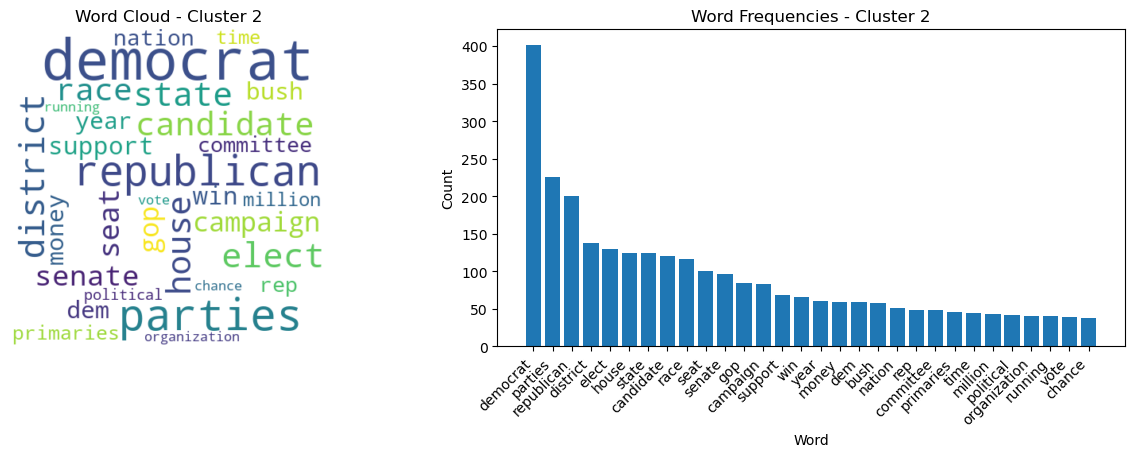

Cluster data - cluster_3:


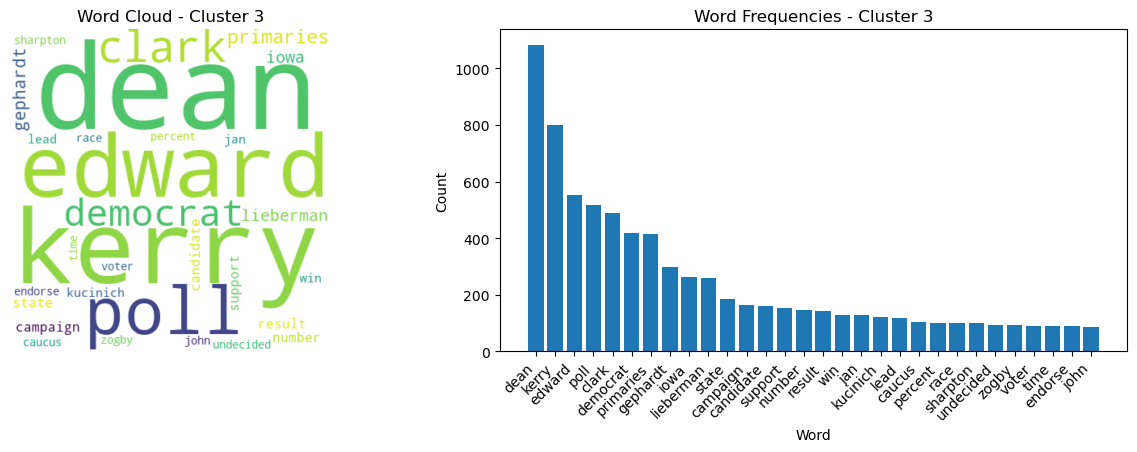

In [39]:
# Set the number of plots per row
plots_per_row = 2

for cluster in range(num_clusters):
    print(f"Cluster data - cluster_{cluster}:")
    cluster_data = pd.read_csv(f'cluster_DBSCAN_{cluster}.csv')
    
    # Calculate word counts
    word_counts = cluster_data.sum(axis=0).sort_values(ascending=False)
    word_counts = pd.DataFrame(word_counts)
    word_counts = word_counts.reset_index()
    word_counts = word_counts.rename(columns={'index': 'Word', 0: 'Count'})
    word_counts_30 = word_counts.head(30)
    
    # Generate word cloud
    word_cloud_dict = dict(zip(word_counts_30['Word'], word_counts_30['Count']))
    wordcloud = WordCloud(width=400, height=400, background_color='white')
    wordcloud.generate_from_frequencies(word_cloud_dict)
    
    # Plot word cloud
    plt.figure(figsize=(13, 8))  # Larger figure size for both plots
    plt.subplot(2, plots_per_row, 1)  # Set subplot for word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Cluster {cluster}')
    
    # Generate bar chart for word frequencies
    plt.subplot(2, plots_per_row, 2)  # Set subplot for word frequencies
    plt.bar(word_counts_30['Word'], word_counts_30['Count'])
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title(f'Word Frequencies - Cluster {cluster}')
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(f'wordcloud_and_freq_cluster_{cluster}.png')
    plt.show()


**In cluster 0,** the preoccupation is with the polls for election day which will be in November, the preoccupation with the number of voters from each party.

**In cluster 1,** the key words are "Bush", "Kerry", "Iraq" and "war". These documents are in the war in Iraq and the follow-up measures that the president chooses.

**In cluster 2,** Comparison between the parties, Democrats and Republicans (the Senate, the House, and the competition).

**In Cluster 3,** the focus is on primary election polls related to the competition for leadership within the Democratic Party,  between Dean and Kerry. 